Preprocesamiento de la Imagen

In [11]:
#Importar librerías
import cv2
import matplotlib.pyplot as plt

In [12]:
# Cargar la imagen del cómic
image = cv2.imread('data\output\divide_pages_test\pages_images_raw\page1_img.jpeg')

# Convertir a escala de grises
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Aplicar umbralización
_, thresh = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV)


 Detección de Contornos

In [13]:
# Detectar contornos
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filtrar contornos pequeños (opcional)
min_area = 1000
contours = [c for c in contours if cv2.contourArea(c) > min_area]


Segmentación de Viñetas

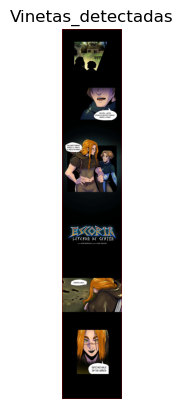

In [14]:
# Crear una lista para almacenar las viñetas
panels = []

# Suponiendo que 'contours' y 'image' ya están definidos
for contour in contours:
    # Obtener el rectángulo delimitador de cada contorno
    x, y, w, h = cv2.boundingRect(contour)
    
    # Extraer la viñeta usando el rectángulo delimitador
    panel = image[y:y+h, x:x+w]
    panels.append(panel)
    
    # Dibujar rectángulos alrededor de las viñetas en la imagen original con color rojo y grosor 3
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 0, 255), 3)

# Convertir la imagen de BGR a RGB para que se muestre correctamente en matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Mostrar la imagen con los rectángulos dibujados usando matplotlib
plt.imshow(image_rgb)
plt.title('Vinetas_detectadas')
plt.axis('off')  # Ocultar los ejes
plt.show()


Procesamiento de Viñetas

In [15]:
# Guardar cada viñeta como una imagen separada
for i, panel in enumerate(panels):
    cv2.imwrite(f'data\output\divide_images_test\panel_{i}.jpg', panel)
